In [1]:
import numpy as np
import struct

width = 240
height = 180

xc = 92

def load_img(name, width = width, height=height):
    with open(rf"v4/{name}.dump", mode='rb') as file: # b is important -> binary
        fileContent = file.read()
    img = np.zeros((width, height))
    x = 0
    y = 0
    for v in struct.iter_unpack("H", fileContent):
        img[x,y] = v[0]
        x += 1
        if x == width:
            x = 0
            y += 1
    return img

def zeroToNone(v):
    return v if v > 0 else None

def draw_yline(ax, img, x, label=""):
    y = range(height)
    x1 = [zeroToNone(img[x,height-i-1]) for i in y]
    ax.scatter(y, x1, label=f"{label}{x}")

def draw_xline(ax, img, y, label=""):
    x = range(width)
    y1 = [zeroToNone(img[i,height-y-1]) for i in x]
    ax.scatter(x, y1, label=f"{label}{y}")

import numpy as np
from PIL import Image

def getImage(img):
    array = np.zeros((img.shape[1],img.shape[0]))
    vmin = 10000000
    vmax = 0
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            v = img[x,y]
            if v < vmin:
                vmin = v
            if v > vmax:
                vmax = v
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            v = int((img[x,y] - vmin) * 255 / (vmax - vmin))
            array[y,x] = v
    return Image.fromarray(array)

def getSMatrix(d):
    size = d * 2 + 1
    X = np.zeros((size, 2))
    for i in range(size):
        X[i,0] = i - d
        X[i,1] = 1
    return np.linalg.inv(X.T @ X) @ X.T

179 [ 2.91532603e-03 -6.18551495e-01  2.13416997e+02] 106.08616114077299 180.6071202398561
159 [ 2.74405096e-03 -5.93536734e-01  2.30941523e+02] 108.14972865783001 198.84610497056283
139 [ 2.51109632e-03 -5.43744358e-01  2.57594481e+02] 108.26831947525804 228.1593371487747
119 [ 3.03067064e-03 -6.66247677e-01  2.99832563e+02] 109.91753253502398 263.21641281356295
99 [ 3.12870884e-03 -6.71506618e-01  3.47265421e+02] 107.31369569967612 311.23449286447453
79 [ 3.16858431e-03 -6.85735287e-01  4.13417417e+02] 108.20846460722456 376.3162354066008
59 [ 1.79107842e-03 -3.70143993e-01  4.82233132e+02] 103.32992386633664 463.10965714967796
39 [ 1.73773901e-03 -3.71709490e-01  5.87162934e+02] 106.9520477500002 567.2853886589066


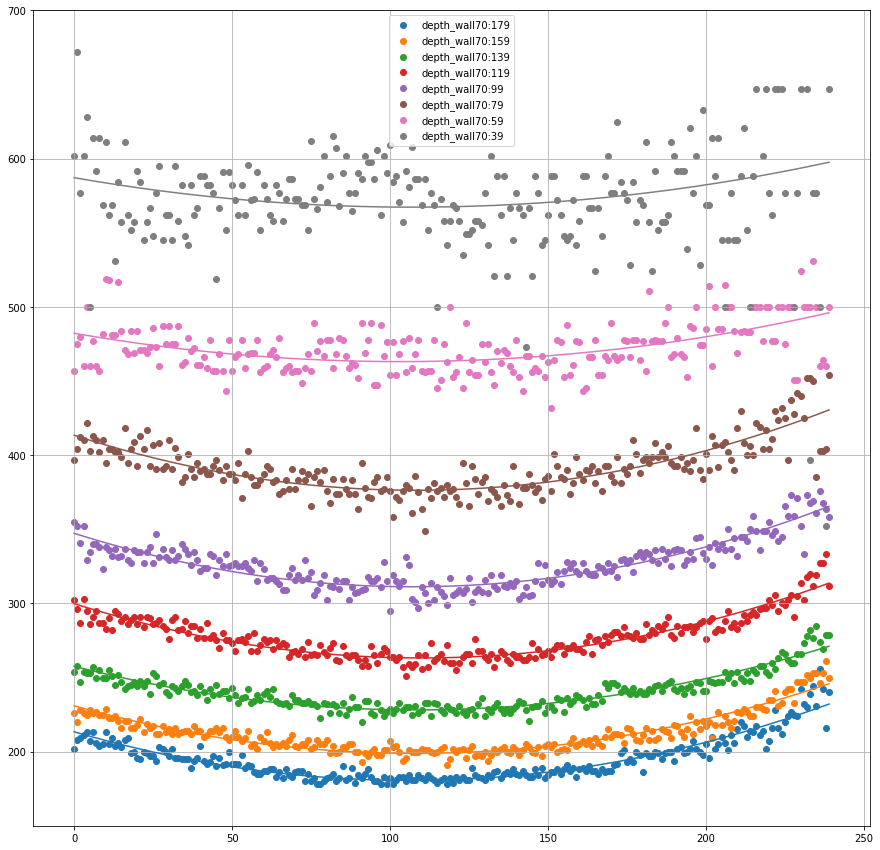

In [2]:
from scipy.ndimage import convolve
from math import *

def countY(c, x):
    v = 0
    for k in c:
        v = v * x + k
    return v

def countC(img, y0):
    xd = []
    yd = []
    for x in range(width):
        d = img[x,y0]
        xd.append(x)
        yd.append(d)
    return np.polyfit(xd, yd, 2)

def dscatter6(ax, file, y0):
    img = load_img(file)
    xd = []
    yd = []
    for x in range(width):
        d = img[x,y0]
        xd.append(x)
        
        yd.append(d)

    ax.scatter(xd, yd, label=f"{file}:{y0}")
    c = countC(img, y0)
    xmin = - c[1] / c[0] / 2
    print(y0, c, xmin, countY(c, xmin))
    xp = []
    yp = []
    for x in range(0, width):
        #v = 0
        #for k in c:
        #    v = v * x + k
        yp.append(countY(c, x))
    ax.plot(xd,yp)

def dscatter7(ax, file):
    for y in range(1,151, 20):
        dscatter6(ax, file, height - y)
    

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()
    
dscatter7(ax, "depth_wall70")
    
ax.grid(True)
ax.legend()
ax.set_ylim(150,700)
#ax.set_xlim(0,80)
    
plt.show()

179 [ 2.38155273e-03 -5.13301243e-01  1.85432409e+02] 107.76608822255706 157.77417536483506
159 [ 2.21816740e-03 -4.91862264e-01  1.96567037e+02] 110.87131299504914 169.30032936012702
139 [ 1.97421606e-03 -4.31812637e-01  2.13058239e+02] 109.3630648135828 189.44606202525986
119 [ 2.36406592e-03 -5.28509385e-01  2.41241766e+02] 111.77974788091774 211.7034435146721
99 [ 2.63723989e-03 -5.78196998e-01  2.72783898e+02] 109.62161628863848 241.09245326701534
79 [ 2.95986175e-03 -6.33444737e-01  3.14855324e+02] 107.0057979479815 280.9641941057095
59 [ 3.19701108e-03 -6.76509041e-01  3.67672493e+02] 105.80336194066102 331.88402736072453
39 [ 3.34358187e-03 -7.00905595e-01  4.32616286e+02] 104.81358342725969 395.88407236310354


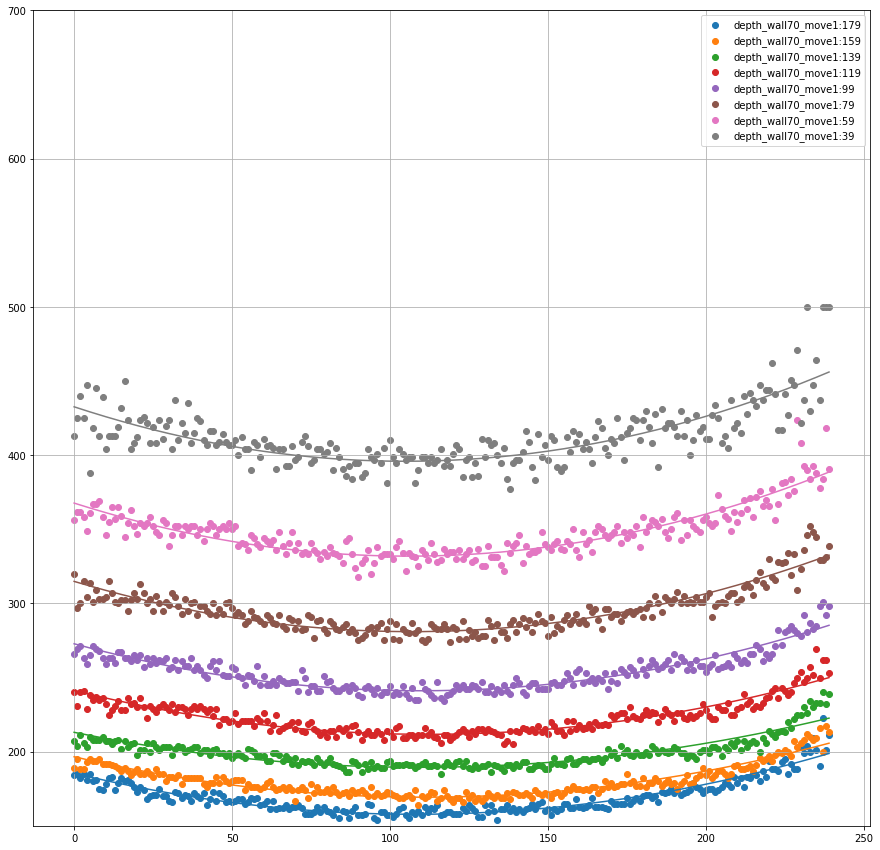

In [10]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()
    
dscatter7(ax, "depth_wall70_move1")
    
ax.grid(True)
ax.legend()
ax.set_ylim(150,700)
#ax.set_xlim(0,80)
    
plt.show()

179 [ 2.98590756e-03 -5.96237075e-01  2.41941216e+02] 99.84185072233545 212.17650994041264
159 [ 2.99620607e-03 -6.10424315e-01  2.66631761e+02] 101.86621033172132 235.540955333266
139 [ 3.02947817e-03 -5.96648973e-01  3.02729937e+02] 98.4738855978021 273.3527659132249
119 [ 3.32551246e-03 -6.46808799e-01  3.54042319e+02] 97.24949245598917 322.59140567196147
99 [ 3.23538721e-03 -6.01363935e-01  4.15647930e+02] 92.93538841455813 387.70393417958337
79 [ 1.71550890e-03 -2.52641482e-01  4.89579295e+02] 73.63455879391068 480.27772266186327
59 [ 3.46468033e-03 -4.44867919e-01  6.05163371e+02] 64.20042777175584 590.8830161153866
39 [ 8.47218355e-03 -1.91390333e+00  7.68306607e+02] 112.95218738011725 660.2168231662624


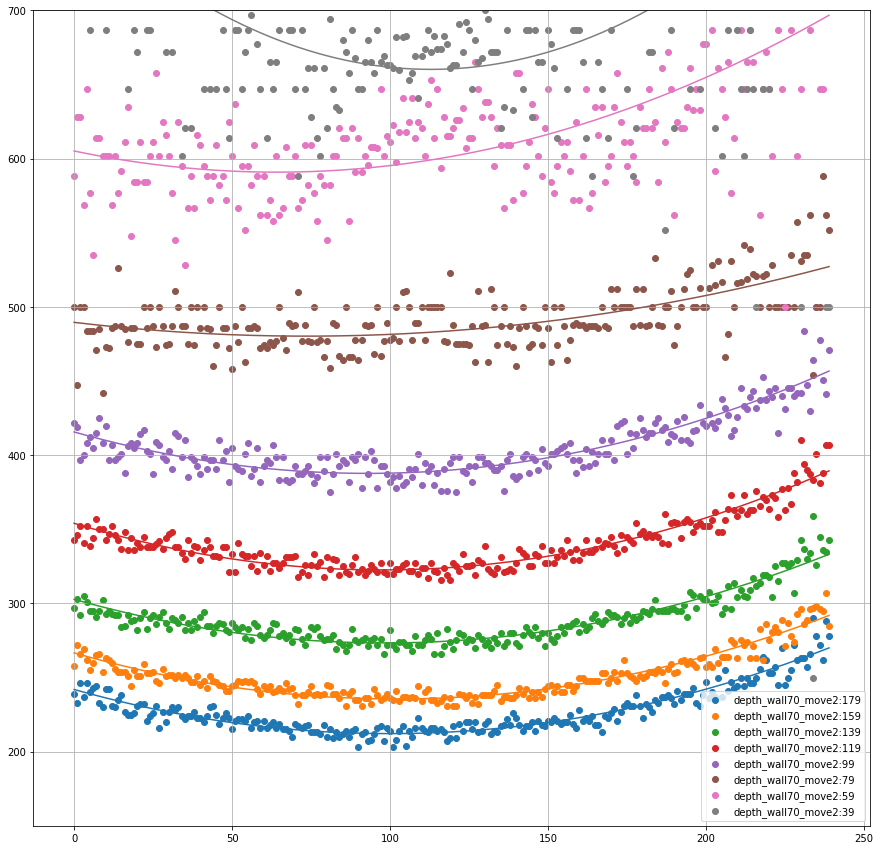

In [11]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()
    
dscatter7(ax, "depth_wall70_move2")
    
ax.grid(True)
ax.legend()
ax.set_ylim(150,700)
#ax.set_xlim(0,80)
    
plt.show()

179 [ 2.86042806e-03 -5.97145144e-01  2.03831401e+02] 104.38038159460203 172.66628165648453
159 [ 2.72014767e-03 -5.67515335e-01  2.20596378e+02] 104.31700843485531 190.99562728269942
139 [ 2.66441729e-03 -5.45145268e-01  2.47811500e+02] 102.30103060485122 219.92703898202785
119 [ 3.10042413e-03 -6.35264722e-01  2.89628359e+02] 102.44803544314918 257.08754712143934
99 [ 2.37019747e-03 -5.12872532e-01  3.36002005e+02] 108.1919415030815 308.2576673274217
79 [-1.17655047e-03 -1.86512229e-02  3.88790100e+02] -7.926231528411389 388.8640171748949
59 [ 2.82602083e-04 -9.01068522e-01  4.94618927e+02] 1594.2354542734115 -223.63876516173457
39 [ 5.79856958e-03 -2.56862997e+00  5.98284440e+02] 221.48824207286432 313.8237723764681


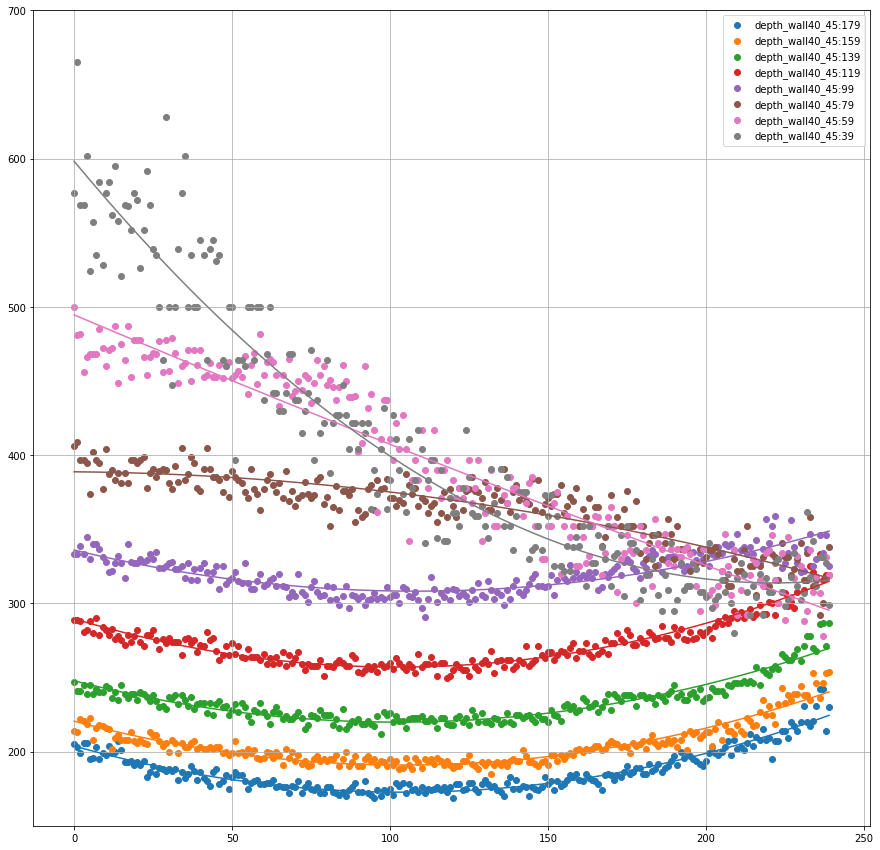

In [12]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()
    
dscatter7(ax, "depth_wall40_45")
    
ax.grid(True)
ax.legend()
ax.set_ylim(150,700)
#ax.set_xlim(0,80)
    
plt.show()

depth_wall70_move1 [4.22255396e-05 1.53886294e-03 6.75220611e-01 1.56320618e+02] -18.221945231019696
depth_wall70 [7.99831194e-05 1.27718056e-03 1.04547361e+00 1.78495318e+02] -7.984063219020143
depth_wall70_move2 [8.10300063e-05 6.99370959e-03 1.15905637e+00 2.10110041e+02] -43.155060135234685


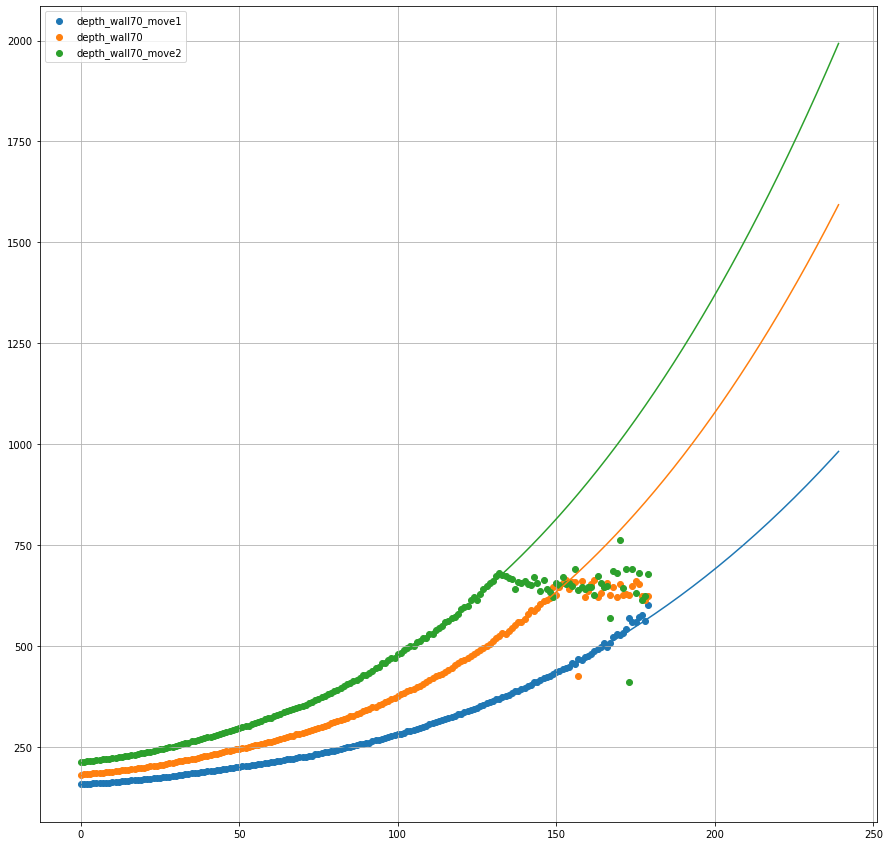

In [39]:
def drawMin(ax, file, yc):
    img = load_img(file)
    yd = []
    dd = []
    yf = []
    df = []
    for y in range(height):
        y1 = height - y - 1
        c = countC(img, y)
        xmin = - c[1] / c[0] / 2
        dmin = countY(c, xmin)
        yd.append(y1)
        dd.append(dmin)
        if y > yc:
            yf.append(y1)
            df.append(dmin)
    ax.scatter(yd, dd, label=f"{file}")
    c = np.polyfit(yf, df, 3)
    pmin = - c[1] / c[0] / 2
    print(file, c, pmin)
    xp = []
    yp = []
    for x in range(0, width):
        xp.append(x)
        yp.append(countY(c, x))
    ax.plot(xp, yp)
    
    
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()
    
drawMin(ax, "depth_wall70_move1", 20,)
drawMin(ax, "depth_wall70", 40)
drawMin(ax, "depth_wall70_move2", 50)

ax.grid(True)
ax.legend()
#ax.set_ylim(100,300)
#ax.set_xlim(150,200)
    
plt.show()

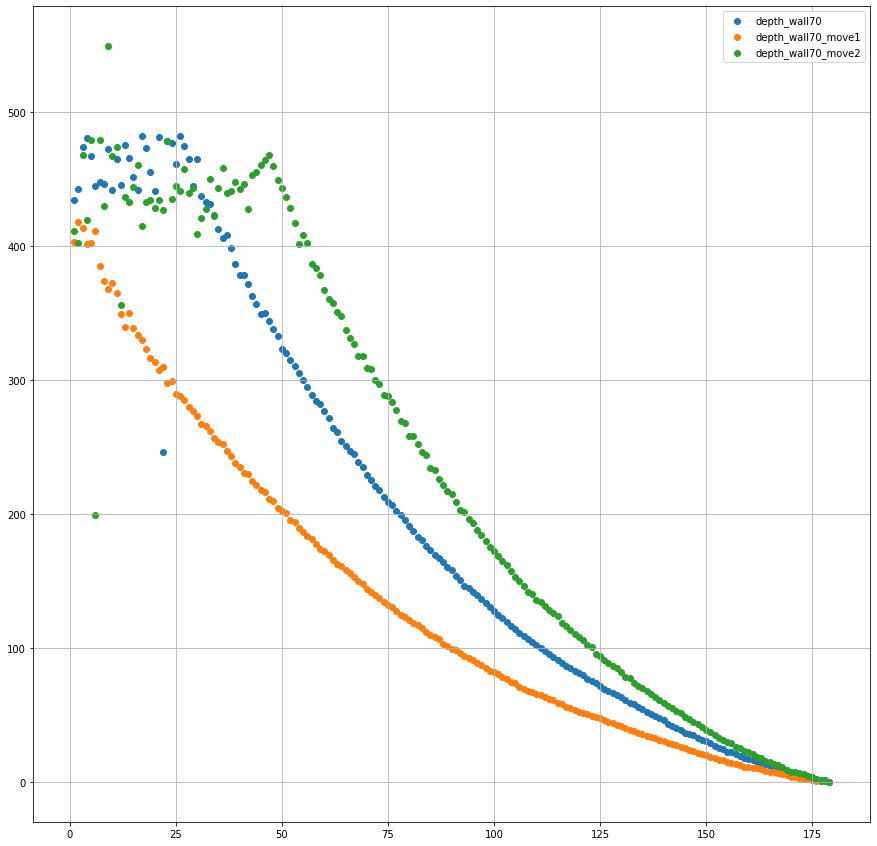

In [18]:
def drawMin2(ax, file):
    img = load_img(file)
    yd = []
    dd = []
    dmin0 = None
    for y in range(height- 1, 0, -1):
        c = countC(img, y)
        xmin = - c[1] / c[0] / 2
        dmin = countY(c, xmin)
        if dmin0 is None:
            dmin0 = dmin
            dmin = 0
        else:
            dmin -= dmin0
        yd.append(y)
        dd.append(dmin)
    ax.scatter(yd, dd, label=f"{file}")
    
    
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()
    
drawMin2(ax, "depth_wall70")
drawMin2(ax, "depth_wall70_move1")
drawMin2(ax, "depth_wall70_move2")

ax.grid(True)
ax.legend()
#ax.set_ylim(150,700)
#ax.set_xlim(0,80)
    
plt.show()